<a href="https://colab.research.google.com/github/tanishajn12/NNDL-Labs/blob/main/NNDL_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess: Flatten and normalize images
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0


In [4]:
# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

In [5]:
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [6]:
# Define activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

In [15]:
input_size = 784   # 28x28 images
hidden_size = 64   # 64 neurons in hidden layer
output_size = 10   # 10 classes (digits 0-9)
learning_rate = 0.01

In [16]:
# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to Hidden weights
b1 = np.zeros((1, hidden_size))  # Hidden layer bias
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to Output weights
b2 = np.zeros((1, output_size))  # Output layer bias

In [20]:
epochs = 1000
batch_size = 50
loss_history = []

In [22]:
for epoch in range(epochs):
    # Randomly select a batch of samples
    batch_idx = np.random.choice(x_train.shape[0], batch_size, replace=False)
    x_batch = x_train[batch_idx]
    y_batch = y_train[batch_idx]

    # Forward Propagation
    hidden_input = np.dot(x_batch, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_batch - y_pred) ** 2)
    loss_history.append(loss)

    # Backpropagation
    output_error = y_batch - y_pred  # Difference between actual & predicted
    output_delta = output_error * sigmoid_derivative(y_pred)  # Gradient at output

    hidden_error = np.dot(output_delta, W2.T)  # Error contribution from output layer
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)  # Gradient at hidden layer

    # Update Weights & Biases using Gradient Descent
    W2 += np.dot(hidden_output.T, output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(x_batch.T, hidden_delta) * learning_rate
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Print loss every 100 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")

Epoch 0, Loss: 0.01465
Epoch 50, Loss: 0.01428
Epoch 100, Loss: 0.01245
Epoch 150, Loss: 0.01946
Epoch 200, Loss: 0.02045
Epoch 250, Loss: 0.01215
Epoch 300, Loss: 0.01451
Epoch 350, Loss: 0.01969
Epoch 400, Loss: 0.01502
Epoch 450, Loss: 0.02557
Epoch 500, Loss: 0.00784
Epoch 550, Loss: 0.01118
Epoch 600, Loss: 0.01670
Epoch 650, Loss: 0.01414
Epoch 700, Loss: 0.02062
Epoch 750, Loss: 0.01156
Epoch 800, Loss: 0.02092
Epoch 850, Loss: 0.01776
Epoch 900, Loss: 0.01562
Epoch 950, Loss: 0.01069


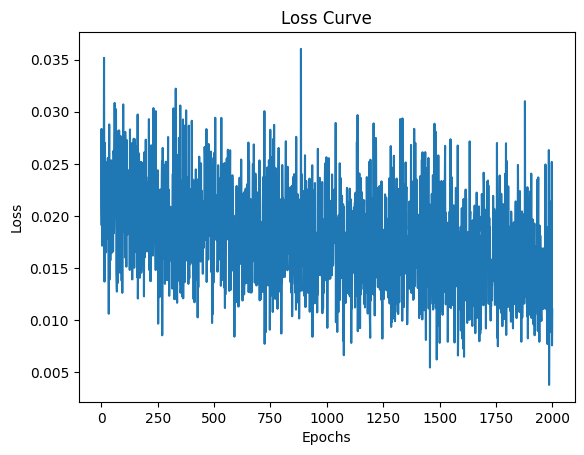

In [23]:
# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


In [24]:
for epoch in range(epochs):
    # Randomly select a batch of samples
    batch_idx = np.random.choice(x_train.shape[0], batch_size, replace=False)
    x_batch = x_train[batch_idx]
    y_batch = y_train[batch_idx]

    # Forward Propagation
    hidden_input = np.dot(x_batch, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_batch - y_pred) ** 2)
    loss_history.append(loss)

    # Backpropagation
    output_error = y_batch - y_pred  # Difference between actual & predicted
    output_delta = output_error * sigmoid_derivative(y_pred)  # Gradient at output

    hidden_error = np.dot(output_delta, W2.T)  # Error contribution from output layer
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)  # Gradient at hidden layer

    # Update Weights & Biases using Gradient Descent
    W2 += np.dot(hidden_output.T, output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(x_batch.T, hidden_delta) * learning_rate
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")

Epoch 0, Loss: 0.01055
Epoch 100, Loss: 0.01015
Epoch 200, Loss: 0.02226
Epoch 300, Loss: 0.01076
Epoch 400, Loss: 0.01252
Epoch 500, Loss: 0.01233
Epoch 600, Loss: 0.01550
Epoch 700, Loss: 0.01711
Epoch 800, Loss: 0.01090
Epoch 900, Loss: 0.00999


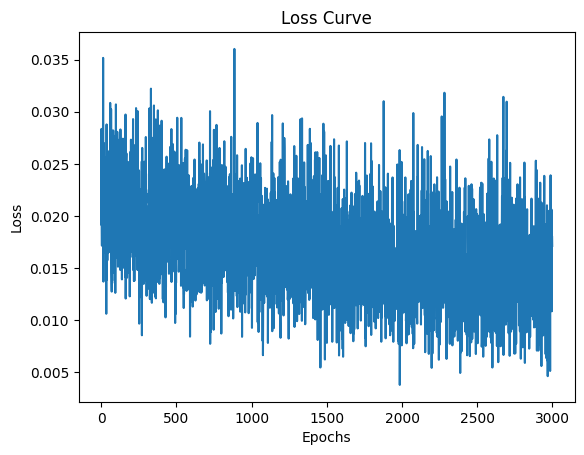

In [25]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [26]:
# Evaluate accuracy
hidden_input = np.dot(x_test, W1) + b1
hidden_output = sigmoid(hidden_input)
final_input = np.dot(hidden_output, W2) + b2
y_pred = sigmoid(final_input)

y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_class == y_test_class)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 92.66%


In [27]:
# Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [29]:
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

In [30]:
# Initialize network parameters
input_size = 784
hidden_size = 64
output_size = 10
learning_rate = 0.01

In [31]:
# Training parameters
epochs = 1000
batch_size = 128
loss_history = []

In [32]:
for epoch in range(epochs):
    batch_idx = np.random.choice(x_train.shape[0], batch_size, replace=False)
    x_batch = x_train[batch_idx]
    y_batch = y_train[batch_idx]

    # Forward Pass
    hidden_input = np.dot(x_batch, W1) + b1
    hidden_output = relu(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    y_pred = softmax(final_input)

    # Compute Loss
    loss = cross_entropy(y_batch, y_pred)
    loss_history.append(loss)

    # Backpropagation
    output_error = y_pred - y_batch
    hidden_error = np.dot(output_error, W2.T) * relu_derivative(hidden_input)

    # Weight Updates (Gradient Descent)
    W2 -= learning_rate * np.dot(hidden_output.T, output_error) / batch_size
    b2 -= learning_rate * np.mean(output_error, axis=0, keepdims=True)

    W1 -= learning_rate * np.dot(x_batch.T, hidden_error) / batch_size
    b1 -= learning_rate * np.mean(hidden_error, axis=0, keepdims=True)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")

Epoch 0, Loss: 1.23077
Epoch 100, Loss: 0.40293
Epoch 200, Loss: 0.64899
Epoch 300, Loss: 0.63025
Epoch 400, Loss: 0.78663
Epoch 500, Loss: 0.46388
Epoch 600, Loss: 0.25366
Epoch 700, Loss: 0.90492
Epoch 800, Loss: 0.62595
Epoch 900, Loss: 0.48998


In [33]:
hidden_input = np.dot(x_test, W1) + b1
hidden_output = relu(hidden_input)
final_input = np.dot(hidden_output, W2) + b2
y_pred = softmax(final_input)

In [34]:
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_class == y_test_class)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 91.37%


In [38]:
loss_history = []
accuracy_history = []

In [39]:
for epoch in range(epochs):
    batch_idx = np.random.choice(x_train.shape[0], batch_size, replace=False)
    x_batch = x_train[batch_idx]
    y_batch = y_train[batch_idx]

    # Forward Pass
    hidden_input = np.dot(x_batch, W1) + b1
    hidden_output = relu(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    y_pred = softmax(final_input)

    loss = cross_entropy(y_batch, y_pred)
    loss_history.append(loss)

    output_error = y_pred - y_batch
    hidden_error = np.dot(output_error, W2.T) * relu_derivative(hidden_input)

    # Weight Updates
    W2 -= learning_rate * np.dot(hidden_output.T, output_error) / batch_size
    b2 -= learning_rate * np.mean(output_error, axis=0, keepdims=True)

    W1 -= learning_rate * np.dot(x_batch.T, hidden_error) / batch_size
    b1 -= learning_rate * np.mean(hidden_error, axis=0, keepdims=True)

    # Evaluate on Test Set
    if epoch % 10 == 0:
        hidden_test = relu(np.dot(x_test, W1) + b1)
        y_test_pred = softmax(np.dot(hidden_test, W2) + b2)
        y_test_class = np.argmax(y_test, axis=1)
        y_pred_class = np.argmax(y_test_pred, axis=1)
        acc = np.mean(y_pred_class == y_test_class)
        accuracy_history.append(acc)
        print(f"Epoch {epoch}, Loss: {loss:.5f}, Accuracy: {acc * 100:.2f}%")

Epoch 0, Loss: 0.33099, Accuracy: 91.41%
Epoch 10, Loss: 0.56819, Accuracy: 91.41%
Epoch 20, Loss: 0.34392, Accuracy: 91.44%
Epoch 30, Loss: 0.49045, Accuracy: 91.38%
Epoch 40, Loss: 0.48703, Accuracy: 91.43%
Epoch 50, Loss: 0.59215, Accuracy: 91.41%
Epoch 60, Loss: 0.30894, Accuracy: 91.39%
Epoch 70, Loss: 0.43122, Accuracy: 91.34%
Epoch 80, Loss: 0.46288, Accuracy: 91.36%
Epoch 90, Loss: 0.68374, Accuracy: 91.30%
Epoch 100, Loss: 0.52429, Accuracy: 91.40%
Epoch 110, Loss: 0.49052, Accuracy: 91.37%
Epoch 120, Loss: 0.30560, Accuracy: 91.37%
Epoch 130, Loss: 0.53919, Accuracy: 91.41%
Epoch 140, Loss: 0.38163, Accuracy: 91.40%
Epoch 150, Loss: 0.30516, Accuracy: 91.33%
Epoch 160, Loss: 0.51044, Accuracy: 91.28%
Epoch 170, Loss: 0.42671, Accuracy: 91.39%
Epoch 180, Loss: 0.38328, Accuracy: 91.40%
Epoch 190, Loss: 0.46436, Accuracy: 91.43%
Epoch 200, Loss: 0.86660, Accuracy: 91.43%
Epoch 210, Loss: 0.30898, Accuracy: 91.45%
Epoch 220, Loss: 0.44726, Accuracy: 91.49%
Epoch 230, Loss: 0.455

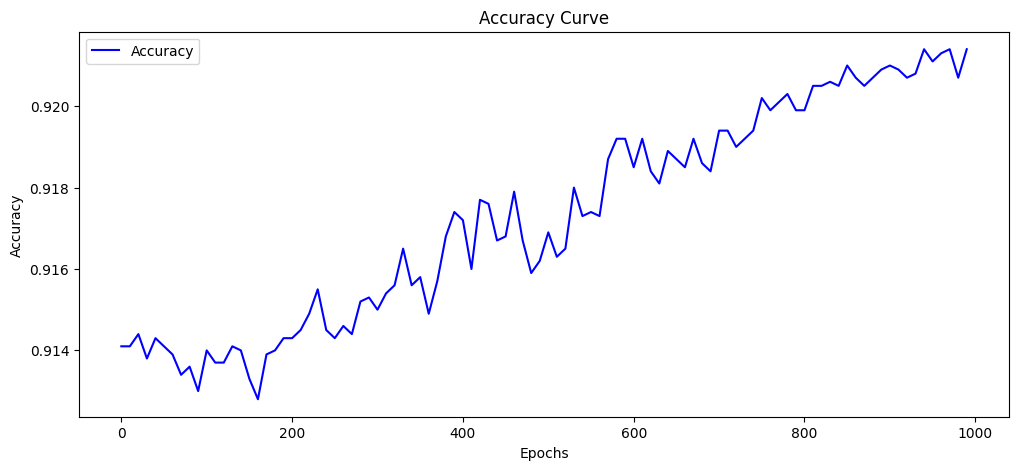

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(range(0, epochs, 10), accuracy_history, label="Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

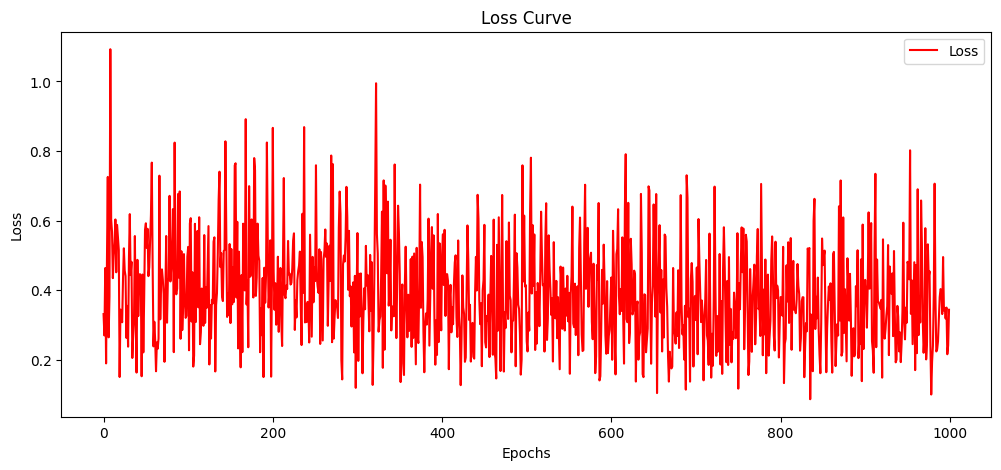

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(loss_history, label="Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

hidden_test = relu(np.dot(x_test, W1) + b1)
y_test_pred = softmax(np.dot(hidden_test, W2) + b2)
y_pred_class = np.argmax(y_test_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

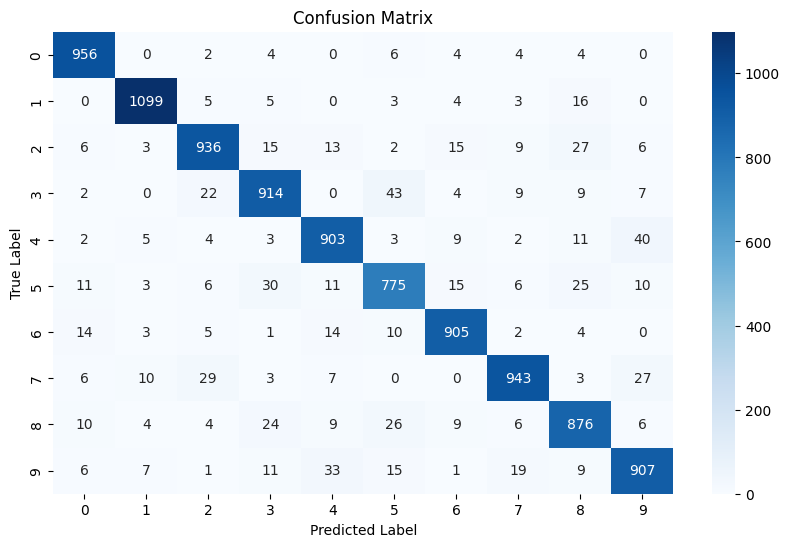

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [48]:
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.91      0.92      0.92       982
           5       0.88      0.87      0.87       892
           6       0.94      0.94      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

